In [1]:
from transpile_benchy.metrics.gate_counts import DepthMetric, TotalMetric
from qiskit.circuit.library import iSwapGate
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import SabreMS, QiskitLevel3
from mirror_gates.utilities import SubsMetric

In [2]:
N = 8
coupling_map = CouplingMap.from_line(N)
coupling_map = CouplingMap.from_heavy_hex(5)

In [3]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("../../circuits/medium_circuits.txt")

In [4]:
import logging

# Create a specific logger for transpile_benchy and set its level to DEBUG
transpile_benchy_logger = logging.getLogger("transpile_benchy")
# transpile_benchy_logger.setLevel(logging.DEBUG)
transpile_benchy_logger.setLevel(logging.INFO)
# transpile_benchy_logger.setLevel(logging.WARNING)

# Silence the qiskit logger by setting its level to WARNING or higher
qiskit_logger = logging.getLogger("qiskit")
qiskit_logger.setLevel(logging.WARNING)

In [5]:
# XXX set consolidate to False
# this is allowed only because my pass manager will preserve consolidation
# see post_stage, I call fastconsolidate manually
metrics = [DepthMetric(consolidate=False), TotalMetric(consolidate=False), SubsMetric()]

transpilers = [
    # QiskitLevel3(coupling_map, cx_basis=True),
    # SabreMS(coupling_map, cx_basis=True, parallel=0),
    QiskitLevel3(coupling_map),
    SabreMS(coupling_map, logger=transpile_benchy_logger),
]

In [6]:
from transpile_benchy.benchmark import Benchmark

benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    metrics=metrics,
    logger=transpile_benchy_logger,
    num_runs=1,
)

benchmark.run()
# print(benchmark)

INFO:transpile_benchy:Running benchmarks for circuits...


Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.50	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 1.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 1.50	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)


Circuits from library:   0%|          | 0/21 [00:00<?, ?it/s]

Loading ghz_state_n23 from QASMBench


Circuits from library:   5%|▍         | 1/21 [00:00<00:16,  1.18it/s]

Loading bv_n14 from QASMBench


Circuits from library:  10%|▉         | 2/21 [00:11<02:01,  6.42s/it]

Loading qec9xz_n17 from QASMBench


Circuits from library:  14%|█▍        | 3/21 [00:28<03:28, 11.57s/it]

Loading bv_n19 from QASMBench


Circuits from library:  19%|█▉        | 4/21 [00:42<03:33, 12.53s/it]

Loading seca_n11 from QASMBench


Circuits from library:  24%|██▍       | 5/21 [01:04<04:10, 15.68s/it]

Loading qram_n20 from QASMBench


Circuits from library:  29%|██▊       | 6/21 [01:29<04:45, 19.05s/it]

Loading knn_n25 from QASMBench


Circuits from library:  33%|███▎      | 7/21 [01:52<04:44, 20.31s/it]

Loading swap_test_n25 from QASMBench


Circuits from library:  38%|███▊      | 8/21 [02:15<04:34, 21.08s/it]

Loading bigadder_n18 from QASMBench


Circuits from library:  43%|████▎     | 9/21 [02:44<04:42, 23.58s/it]

Loading qf21_n15 from QASMBench


Circuits from library:  48%|████▊     | 10/21 [03:08<04:19, 23.62s/it]

Loading multiplier_n15 from QASMBench


Circuits from library:  52%|█████▏    | 11/21 [03:55<05:09, 30.94s/it]

Loading qft_n18 from QASMBench


Circuits from library:  57%|█████▋    | 12/21 [04:43<05:23, 35.94s/it]

Loading sat_n11 from QASMBench


Circuits from library:  62%|██████▏   | 13/21 [05:28<05:11, 38.96s/it]

Loading square_root_n7 from RedQueen


Circuits from library:  67%|██████▋   | 14/21 [05:29<03:11, 27.37s/it]

Loading hub_n18 from BQSKitInterface


Circuits from library:  71%|███████▏  | 15/21 [05:30<01:55, 19.30s/it]

Loading portfolioqaoa_n16 from MQTBench


Circuits from library:  76%|███████▌  | 16/21 [08:54<06:14, 74.87s/it]

Loading dj_n16 from MQTBench


Circuits from library:  81%|████████  | 17/21 [09:11<03:50, 57.73s/it]

Loading qftentangled_n16 from MQTBench


Circuits from library:  86%|████████▌ | 18/21 [09:56<02:41, 53.81s/it]

Loading qpeexact_n16 from MQTBench


Circuits from library:  90%|█████████ | 19/21 [10:38<01:40, 50.36s/it]

Loading ae_n16 from MQTBench


Circuits from library:  95%|█████████▌| 20/21 [11:22<00:48, 48.24s/it]

Loading vqe_n16 from MQTBench


Circuits from library: 100%|██████████| 21/21 [12:48<00:00, 36.60s/it]


In [7]:
print(benchmark)


Transpiler: Qiskit-$\sqrt{\texttt{iSWAP}}$

  Metric: accepted_subs
  Circuit: ae_n16                                   Mean result: 0.000                          Trials: [0]
  Circuit: bigadder_n18                             Mean result: 0.000                          Trials: [0]
  Circuit: bv_n14                                   Mean result: 0.000                          Trials: [0]
  Circuit: bv_n19                                   Mean result: 0.000                          Trials: [0]
  Circuit: dj_n16                                   Mean result: 0.000                          Trials: [0]
  Circuit: ghz_state_n23                            Mean result: 0.000                          Trials: [0]
  Circuit: knn_n25                                  Mean result: 0.000                          Trials: [0]
  Circuit: multiplier_n15                           Mean result: 0.000                          Trials: [0]
  Circuit: portfolioqaoa_n16                        Mean result: 0.

In [8]:
benchmark.summary_statistics(transpilers[0], transpilers[1])

{'monodromy_depth': {'average_change': -18.661837515770824,
  'best_circuit': 'qftentangled_n16',
  'worst_circuit': 'swap_test_n25'},
 'monodromy_total': {'average_change': -0.9054391693502423,
  'best_circuit': 'qpeexact_n16',
  'worst_circuit': 'bv_n19'},
 'accepted_subs': {'average_change': inf,
  'best_circuit': 'ghz_state_n23',
  'worst_circuit': 'qec9xz_n17'},
 'total_runtime': {'average_change': 9631.944648173681,
  'best_circuit': 'vqe_n16',
  'worst_circuit': 'dj_n16'}}

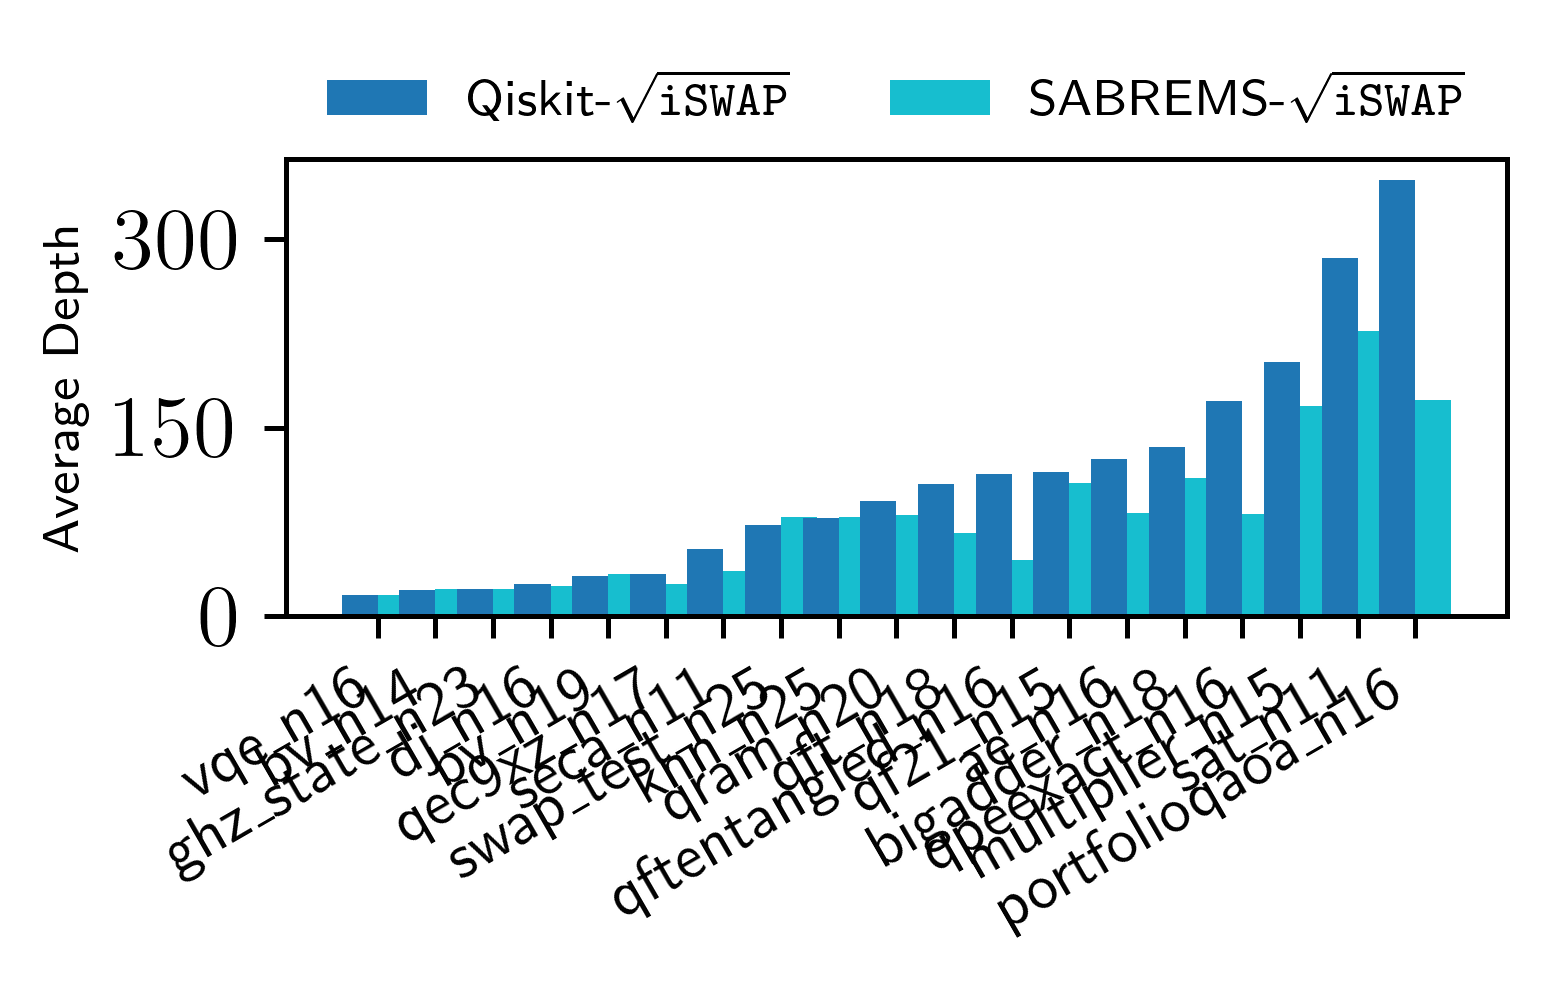

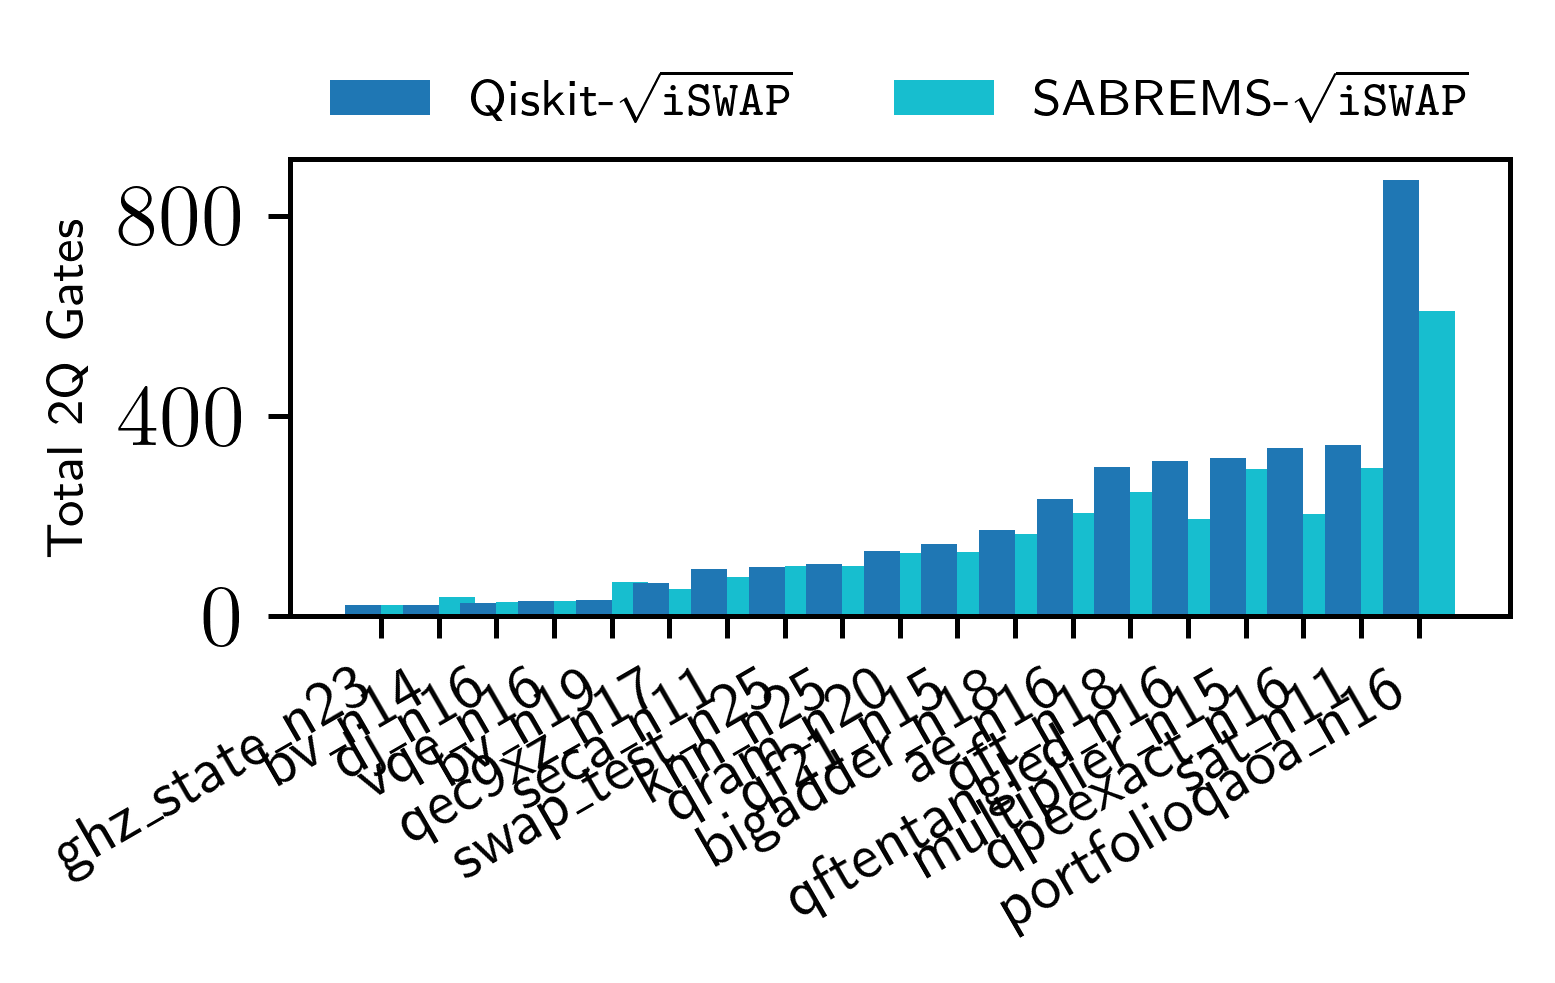

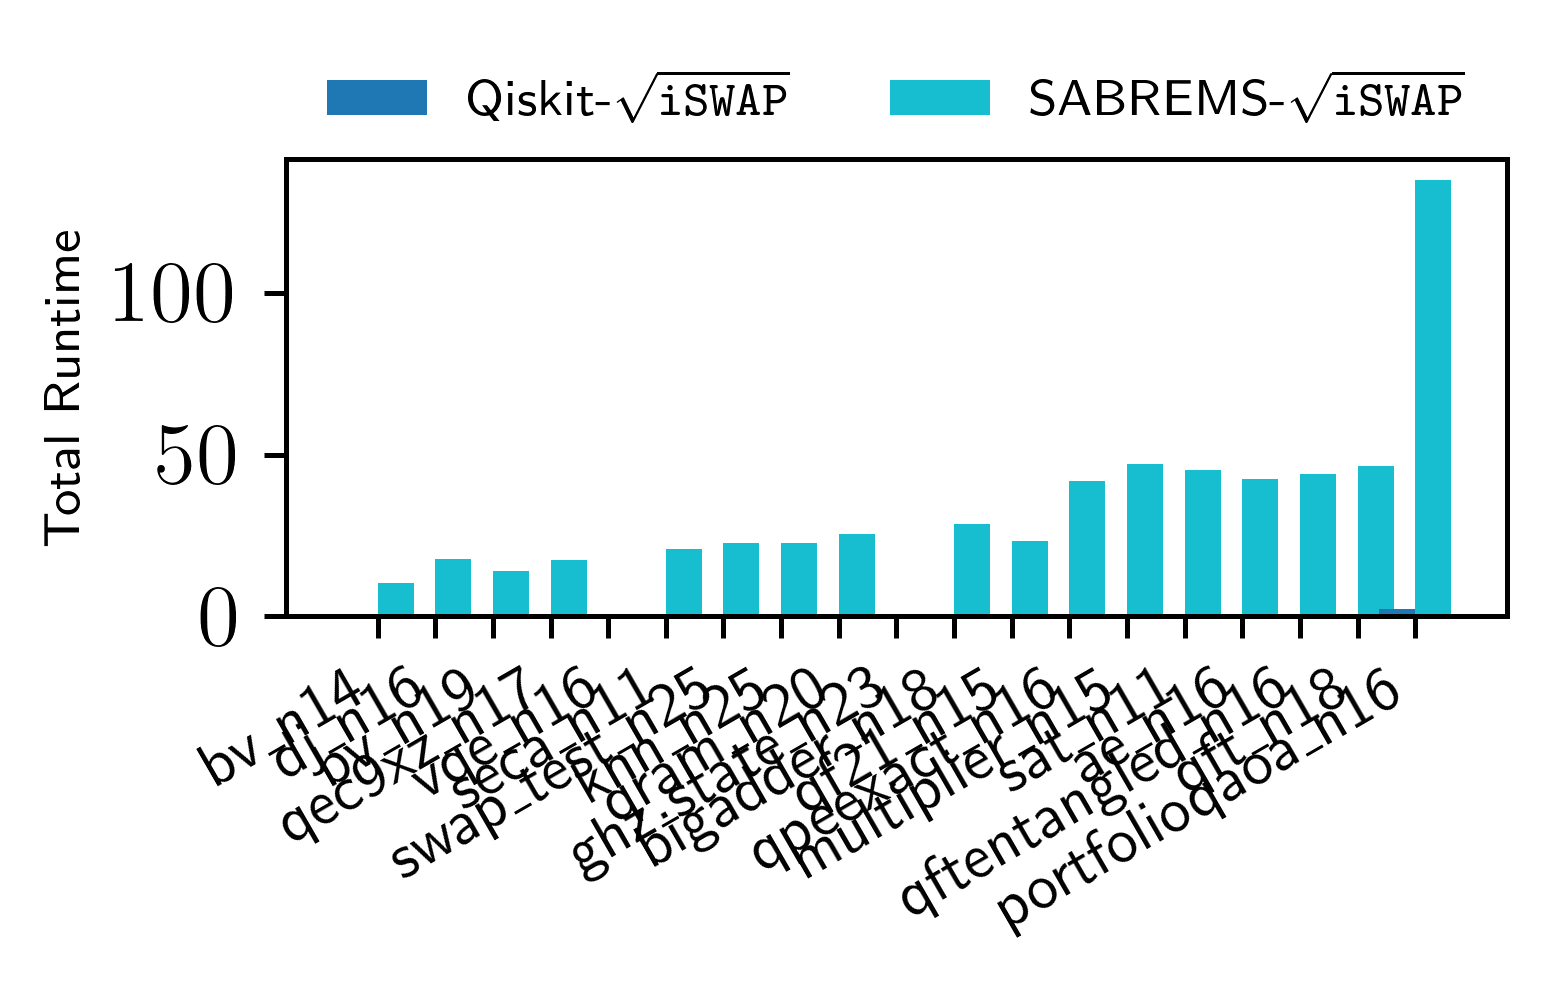

In [10]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, save=1, legend_show=1, filename="hex")